In [1]:
import torch
print(torch.__version__)

2.2.1


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


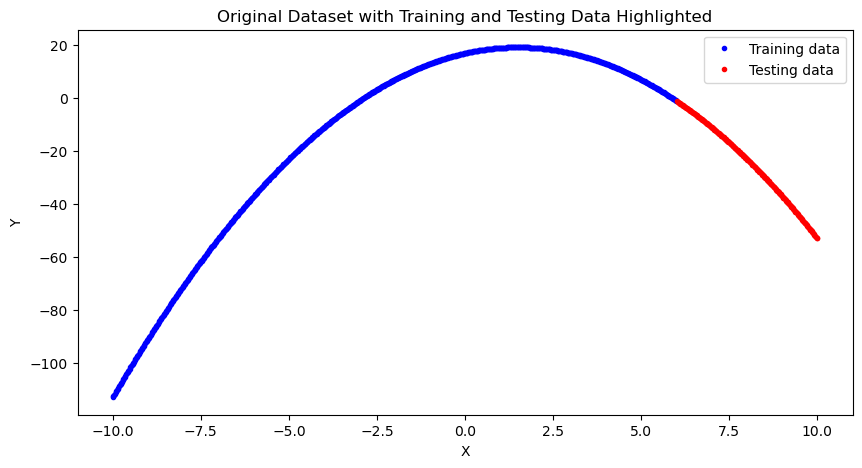

In [3]:
# Original dataset
x = np.linspace(-10, 10, 1000)
y = -x**2 + 3*x +17

# Splitting dataset into training and testing
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(x) * split_ratio)

x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

# Convert to tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Visualization of the dataset
plt.figure(figsize=(10, 5))
plt.plot(x_train, y_train, 'b.', label='Training data')
plt.plot(x_test, y_test, 'r.', label='Testing data')
plt.legend()
plt.title("Original Dataset with Training and Testing Data Highlighted")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
class Net(nn.Module):
    def __init__(self,degree):
        super(Net, self).__init__()
        self._degree = degree
        self.fc1 = nn.Linear(self._degree, 16)  # Input layer to hidden layer
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1) # Hidden layer to output layer
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(0.1)
        

    def forward(self, x):
        x = self.drop(self.fc1(self._polynomial_features(x)))
        # x = self.relu(self.fc2(x))
        # x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    def _polynomial_features(self, x):
        return torch.cat([x ** i for i in range(1, self._degree + 1)], 1)

model = Net(degree = 2)


Epoch [100/5000], Loss: 666.6223
Epoch [200/5000], Loss: 361.6790
Epoch [300/5000], Loss: 314.1391
Epoch [400/5000], Loss: 287.7434
Epoch [500/5000], Loss: 275.3569
Epoch [600/5000], Loss: 235.9030
Epoch [700/5000], Loss: 203.3623
Epoch [800/5000], Loss: 168.2031
Epoch [900/5000], Loss: 131.9658
Epoch [1000/5000], Loss: 112.1777
Epoch [1100/5000], Loss: 101.8229
Epoch [1200/5000], Loss: 90.4041
Epoch [1300/5000], Loss: 78.5289
Epoch [1400/5000], Loss: 80.0221
Epoch [1500/5000], Loss: 66.3813
Epoch [1600/5000], Loss: 59.3936
Epoch [1700/5000], Loss: 58.6770
Epoch [1800/5000], Loss: 50.4649
Epoch [1900/5000], Loss: 44.3617
Epoch [2000/5000], Loss: 43.8199
Epoch [2100/5000], Loss: 38.4107
Epoch [2200/5000], Loss: 31.3034
Epoch [2300/5000], Loss: 24.2450
Epoch [2400/5000], Loss: 27.3136
Epoch [2500/5000], Loss: 24.2620
Epoch [2600/5000], Loss: 18.6626
Epoch [2700/5000], Loss: 15.8978
Epoch [2800/5000], Loss: 17.7324
Epoch [2900/5000], Loss: 17.0374
Epoch [3000/5000], Loss: 19.1933
Epoch [3

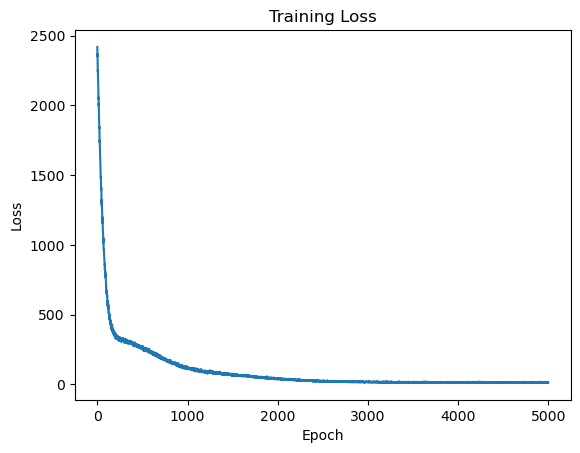

In [5]:
# Loss and optimizer
criterion1 = nn.MSELoss()
criterion2 = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    loss = criterion1(outputs, y_train_tensor) #+ criterion2(outputs, y_train_tensor)

    losses.append(loss.item())
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot the training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

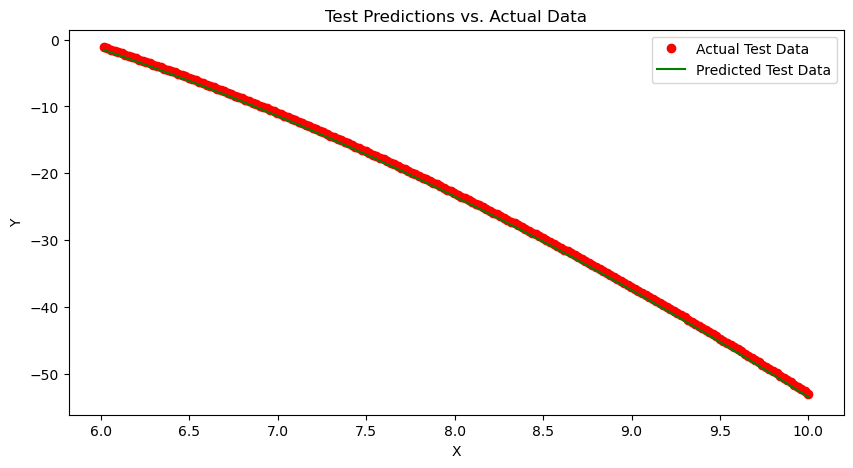

In [6]:
model.eval()
with torch.no_grad():
    predicted_test = model(x_test_tensor).numpy()

# Visualization of the test predictions along with the original function
plt.figure(figsize=(10, 5))
plt.plot(x_test, y_test, 'ro', label='Actual Test Data')
plt.plot(x_test, predicted_test, 'g-', label='Predicted Test Data')
plt.legend()
plt.title("Test Predictions vs. Actual Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()